# Descriptive Statistics for the GoFundMe dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gofund_data.csv', usecols=['m_campaign', 'title', 'raised', 'target', 'donors', 'shares', 'followers'])

In [3]:
## Remove currency symbols | convert to type(float)
df['raised'] = df['raised'].str.replace('€', '')
df['target'] = df['target'].str.replace('€', '')
df['raised'] = df['raised'].str.replace('$', '')
df['target'] = df['target'].str.replace('$', '')
df['raised'] = df['raised'].str.replace(',', '')
df['target'] = df['target'].str.replace(',', '')
df['raised'] = df['raised'].astype(int)
df['target'] = df['target'].astype(int)

In [4]:
df.dtypes

title          object
raised          int64
target          int64
m_campaign     object
donors        float64
shares        float64
followers     float64
dtype: object

In [5]:
df.columns

Index(['title', 'raised', 'target', 'm_campaign', 'donors', 'shares',
       'followers'],
      dtype='object')

In [6]:
df.head(10)

,title,raised,target,m_campaign,donors,shares,followers
0,The Front Steps Project YYC,695,1000,animal-fundraiser,16.0,21.0,14.0
1,Torchlight COVID-19 Fund for Joseph Brant Hosp...,695,300,medical-fundraiser,10.0,0.0,10.0
2,Actions Against Abuse,690,1000,volunteer-fundraiser,28.0,70.0,27.0
3,#ClubQUARANTINE Canada,690,500,emergency-fundraiser,16.0,0.0,16.0
4,Wheeling for Kids Help Phone,690,1000,medical-fundraiser,12.0,0.0,12.0
5,Walker Sisters & Family for COVID-19 Response ...,690,500,emergency-fundraiser,8.0,0.0,1.0
6,Tala and Marah's campaign,680,1000,volunteer-fundraiser,14.0,81.0,14.0
7,"Row, run, walk or cycle for Covid-19 research",680,5000,medical-fundraiser,17.0,11.0,17.0
8,BC Children's Hospital,680,6000,volunteer-fundraiser,7.0,0.0,7.0
9,Quarantining Art,676,100,medical-fundraiser,12.0,0.0,12.0


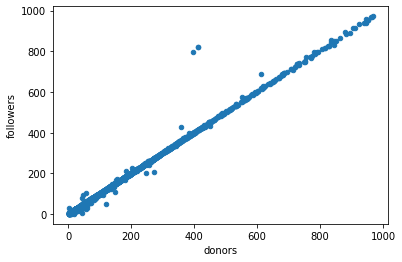

In [7]:
df.plot.scatter(x='donors', y='followers')

## Amount Raised by Category

In [8]:
df_rc = pd.melt(df, id_vars=['m_campaign'], value_vars='raised', value_name='Amount Raised', var_name='Category')
df_rc = df_rc.groupby('m_campaign').sum()
df_rc.rename_axis('Category', inplace=True)
pd.options.display.float_format = '{:,.2f}'.format
df_rc = df_rc.sort_values('Amount Raised', ascending=False)
df_rc

,Amount Raised
Category,
competition-fundraiser,1001113846
newlywed-fundraiser,266540890
travel-fundraiser,97447367
medical-fundraiser,18654746
emergency-fundraiser,11709363
memorial-fundraiser,11515473
community-fundraiser,6693148
family-fundraiser,4938286
animal-fundraiser,2492360


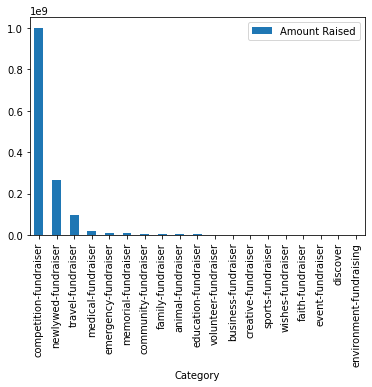

In [9]:
df_rc.plot(kind='bar')

## Number of Campaigns per Category

In [10]:
df_cat = df[['m_campaign', 'title']]
df_cat = df_cat.groupby('m_campaign').count()
df_cat.drop(index='discover', inplace=True)
df_cat.rename_axis('Category', inplace=True)
df_cat = df_cat.rename(columns={'title': 'Number of Campaigns'})
df_cat = df_cat.sort_values(by='Number of Campaigns', ascending=True)
df_cat

,Number of Campaigns
Category,
environment-fundraising,9
newlywed-fundraiser,191
competition-fundraiser,338
wishes-fundraiser,341
travel-fundraiser,369
business-fundraiser,377
event-fundraiser,378
sports-fundraiser,382
memorial-fundraiser,408


In [16]:
df_cat.columns

Index(['Number of Campaigns'], dtype='object')

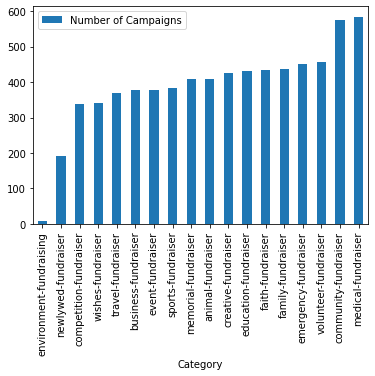

In [11]:
df_cat.plot.bar()

## Visualize Amount Raised vs Number of Donors

In [12]:
df_rv = pd.DataFrame(df[['m_campaign', 'donors', 'raised']])
df_rv

,m_campaign,donors,raised
0,animal-fundraiser,16.00,695
1,medical-fundraiser,10.00,695
2,volunteer-fundraiser,28.00,690
3,emergency-fundraiser,16.00,690
4,medical-fundraiser,12.00,690
...,...,...,...
7072,memorial-fundraiser,234.00,26010
7073,memorial-fundraiser,145.00,25951
7074,memorial-fundraiser,298.00,25815
7075,memorial-fundraiser,369.00,25610


## Model Linear Regression

In [33]:
from scipy.stats import linregress

In [53]:
df.columns

Index(['title', 'raised', 'target', 'm_campaign', 'donors', 'shares',
       'followers'],
      dtype='object')

In [56]:
df[['m_campaign', 'donors', 'raised']].groupby(['m_campaign']).mean()

,donors,raised
m_campaign,,
animal-fundraiser,80.82,"6,078.93"
business-fundraiser,52.92,"4,384.40"
community-fundraiser,84.28,"11,660.54"
competition-fundraiser,63.36,"2,961,875.28"
creative-fundraiser,31.04,"3,590.32"
discover,49.08,"3,976.33"
education-fundraiser,51.66,"5,723.30"
emergency-fundraiser,190.52,"26,020.81"
environment-fundraising,20.29,"1,760.33"


In [58]:
var = df_rv['raised'] < 3000

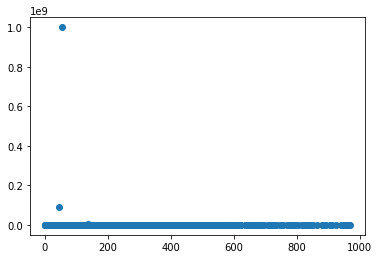

In [38]:
# Set vars
x = df_rv.donors
y = df_rv.raised

# Formula
stats = linregress(x, y)
m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m*x+b, color='red', linewidth=5)
plt.show()
